In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from scipy.stats import mannwhitneyu
import math
import scipy.stats
import sys
sys.path.append('../')
from functions import *

In [2]:
save_images = False

In [3]:
def curvature(x_path, y_path,scale):
    r, xcs, ycs = [],[],[]
    num_points = len(x_path)

    for i in range(int(scale),int(num_points-scale)):
        x1 = x_path[i-int(scale)]
        y1 = y_path[i-int(scale)]
        x2 = x_path[i]
        y2 = y_path[i]
        x3 = x_path[i+int(scale)]
        y3 = y_path[i+int(scale)]
        
        ma = (y2 - y1)/(x2 - x1)
        mb = (y3 - y2)/(x3 - x2)
        xc = (ma*mb*(y1 - y3) + mb*(x1 + x2) - ma*(x2 + x3))/(2*(mb - ma))
        yc = -1/ma*(xc - (x1 + x2)/2) + (y1 + y2)/2

        if ma == mb:
            rad = float(np.inf)
        else:
            rad = float(np.hypot(xc - x1, yc - y1))

        nv1 = np.cross(np.array([x2 - x1, y2 - y1, 0]), np.array([0 ,0, 1]))
        nv2 = np.cross(np.array([x3 - x2, y3 - y2, 0]), np.array([0 ,0, 1]))
        nv = np.average([nv1, nv2], axis = 0)
        align = -np.sign(np.dot(nv[0:2], np.array([x2 - xc, y2 - yc])))

        if rad == 0:
            r.append(np.nan)
        else:
            r.append(align * 1./rad)
            
        xcs.append(xc)
        ycs.append(yc)

    return r

In [5]:
df_noforce_Mkzero = pd.read_pickle("../fig2/noforce_Fx_Fy_Mp.pkl")
df_force_Mkzero = pd.read_pickle("force_Mkzero.pkl")
df_force_Mknonzero = pd.read_pickle("force_Mknonzero.pkl")

2.5933972821846805


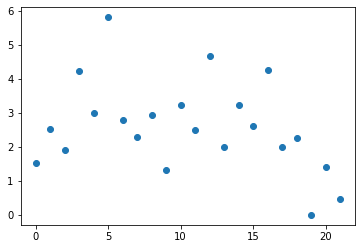

In [6]:
F_ext = df_force_Mkzero["Fext"].values
Fext_mean = np.mean(F_ext)
print(Fext_mean)

plt.plot(F_ext, 'o')

## Displaying example

In [14]:
path = "../../dat/WT manipulated k-fiber shapes/"
spindle = "20190927_cell008" # 20210526_cell004, 20210526_cell001, 20180628_cell010, 20180611_cell002

df_profile = pd.read_csv("%s/%s/kfiber_before.csv"%(path,spindle))
x_dat = np.array(df_profile["X"].values)
y_dat = np.array(df_profile["Y"].values)
image = mpimg.imread("%s/%s/%s_before.tif"%(path,cell,cell))
plt.imshow(image, cmap ='gray')
plt.plot([i-2 for i in x_dat], [i-10 for i in y_dat], color = 'orange', lw = 3)

plt.xlim(25,250)
plt.ylim(20,160)
plt.gca().invert_yaxis()
plt.axis("off")
if save_images:
    plt.savefig('fig_outputs/example_before_spindle.pdf')
plt.show()

x_dat = x_dat*0.105    
y_dat = y_dat*0.105    

angle = np.arctan((y_dat[-1] - y_dat[0]) / (x_dat[-1] - x_dat[0]))
x_dat,y_dat = rotate(x_dat,y_dat,angle)

# Translation to start at origin
x_dat -= x_dat[0]
y_dat -= y_dat[0]

# Flipping to ensure a positive initial slope
theta0 = np.arctan2(y_dat[3]-y_dat[0], x_dat[3]-x_dat[0])
if theta0 < 0.0:
    y_dat = -y_dat
    angle = -angle

plt.figure(figsize = (3,2))
window = 10
C_dat = curvature(x_dat, y_dat,window)
plt.scatter(x_dat, y_dat, color='lightgrey', s=1)
plt.scatter(x_dat[window:-window], y_dat[window:-window],s = 3, c=C_dat, cmap="seismic", vmin = -1,vmax = 1, lw = 8,zorder=10)
plt.axis("equal")
plt.ylim(-0.2,4.5)
plt.xlim(-0.2,8.2)
plt.xticks([0,2,4,6,8],fontsize=15)
plt.yticks([0,2,4], fontsize=15)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/example_before_curvature.pdf')
plt.show()

# plt.figure(figsize = (3,2))
# plt.scatter(x_mod[window:-window], y_mod[window:-window],s = 3, c=C_mod, cmap="seismic", vmin = -1,vmax = 1, lw = 8,zorder=10)
# plt.scatter(x_mod, y_mod, color='lightgrey', s=1)
# # plt.axis("equal")
# plt.ylim(-0.2,4.5)
# plt.xlim(-0.2,8.2)
# plt.xticks([0,2,4,6,8],fontsize=15)
# plt.yticks([0],fontsize=15)
# plt.tight_layout()
# if save_images:
#     plt.savefig('fig_outputs/Mkzero_model_curvature.pdf')
# plt.show()


NameError: name 'cell' is not defined

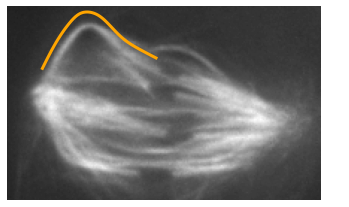

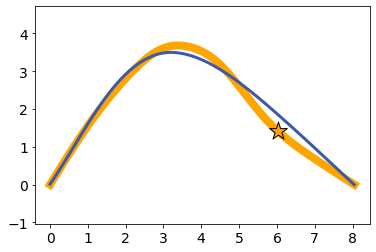

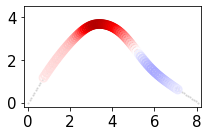

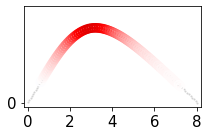

In [15]:
path = "../../dat/WT manipulated k-fiber shapes/"
spindle = "20190927_cell008" # 20210526_cell004, 20210526_cell001, 20180628_cell010, 20180611_cell002

df_filtered_Mkzero = df_force_Mkzero.loc[(df_force_Mkzero['Spindle'] == spindle)]
df_filtered_Mknonzero = df_force_Mknonzero.loc[(df_force_Mknonzero['Spindle'] == spindle)]

for index, row in df_filtered_Mknonzero.iterrows():
    cell = row["Spindle"]
    
    df_profile = pd.read_csv("%s/%s/kfiber.csv"%(path,cell))
    x_dat = np.array(df_profile["X"].values)
    y_dat = np.array(df_profile["Y"].values)
    
    image = mpimg.imread("%s/%s/%s_after.tif"%(path,cell,cell))
    plt.imshow(image, cmap ='gray')
    plt.plot([i-2 for i in x_dat], [i-10 for i in y_dat], color = 'orange', lw = 3)

plt.xlim(25,250)
plt.ylim(20,150)
plt.gca().invert_yaxis()
plt.axis("off")
if save_images:
    plt.savefig('fig_outputs/%s_image.pdf'%spindle)
plt.show()


for index, row in df_filtered_Mkzero.iterrows():
    cell = row["Spindle"]

    df_profile = pd.read_csv("%s/%s/kfiber.csv"%(path,cell))
    x_dat = np.array(df_profile["X"].values)
    y_dat = np.array(df_profile["Y"].values)

    x_dat = row["x_dat"]
    y_dat = row["y_dat"]
    x_mod = row["x"]
    y_mod = row["y"]
    xF = row["xF"]

    y_dat = np.flip(y_dat)
    x_dat = x_dat[-1] - x_dat[0] - np.flip(x_dat)
    y_mod = np.flip(y_mod)
    x_mod = x_mod[-1] - x_mod[0] - np.flip(x_mod)
    xF = np.flip(xF)

    iF_dat = np.where(x_dat > xF)[0][0]
    
    window = 10
    C_dat = curvature(x_dat, y_dat,window)
    C_min_ind = np.where(C_dat == np.min(C_dat[iF_dat:]))[0][0]+window
    
    
    C_mod = curvature(x_mod, y_mod,window)
plt.plot(x_dat, y_dat, color = 'orange', lw = 8)
plt.plot(x_mod, y_mod, color = '#3D59AB', lw = 3)
plt.scatter(x_dat[C_min_ind],y_dat[C_min_ind],marker='*',s=350,color='orange',ec='k',zorder=10)

plt.axis("equal")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if save_images:
    plt.savefig('fig_outputs/%s_Mkzero_fits.pdf'%spindle)
plt.show()

plt.figure(figsize = (3,2))
plt.scatter(x_dat[window:-window], y_dat[window:-window],s = 3, c=C_dat, cmap="seismic", vmin = -1,vmax = 1, lw = 8,zorder=10)
plt.scatter(x_dat, y_dat, color='lightgrey', s=1)
# plt.axis("equal")
plt.ylim(-0.2,4.5)
plt.xlim(-0.2,8.2)
plt.xticks([0,2,4,6,8],fontsize=15)
plt.yticks([0,2,4], fontsize=15)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/Mkzero_data_curvature.pdf')
plt.show()

plt.figure(figsize = (3,2))
plt.scatter(x_mod[window:-window], y_mod[window:-window],s = 3, c=C_mod, cmap="seismic", vmin = -1,vmax = 1, lw = 8,zorder=10)
plt.scatter(x_mod, y_mod, color='lightgrey', s=1)
# plt.axis("equal")
plt.ylim(-0.2,4.5)
plt.xlim(-0.2,8.2)
plt.xticks([0,2,4,6,8],fontsize=15)
plt.yticks([0],fontsize=15)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/Mkzero_model_curvature.pdf')
plt.show()


In [16]:
df_filtered_Mkzero

,Fext,Fx,Fy,L,M,Mk,RMSE,Spindle,gap_max,theta0,thetaF,x,xF,x_dat,y,yF,y_dat
18,1.38276,-0.647732,-0.611399,8.048595,"[0.0, 0.00024838943939238176, 0.00074794108751...",0.0,0.164454,20190927_cell008,0.334547,0.751569,1.374872,"[0.0, 0.0817929173255691, 0.1635900855841178, ...",5.040928,"[0.0, 0.09524296382900754, 0.19047633902850158...","[0.0, 0.07643798033925905, 0.15287141168873472...",3.482907,"[-0.0, 0.06061087230082208, 0.1213263058668643..."


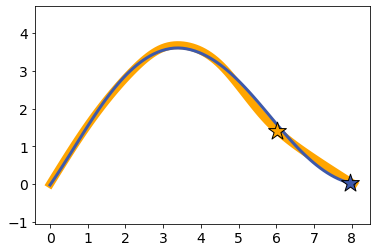

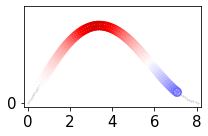

In [17]:
for index, row in df_filtered_Mknonzero.iterrows():
    cell = row["Spindle"]

    df_profile = pd.read_csv("%s/%s/kfiber.csv"%(path,cell))
    x_dat = np.array(df_profile["X"].values)
    y_dat = np.array(df_profile["Y"].values)

    x_dat = row["x_dat"]
    y_dat = row["y_dat"]
    x_mod = row["x"]
    y_mod = row["y"]
    M_mod = row["M"]
    xF = row["xF"]

    y_dat = np.flip(y_dat)
    x_dat = x_dat[-1] - x_dat[0] - np.flip(x_dat)
    y_mod = np.flip(y_mod)
    x_mod = x_mod[-1] - x_mod[0] - np.flip(x_mod)
    M_mod = np.flip(M_mod)
    xF = np.flip(xF)

    iF_mod = np.where(x_mod > xF)[0][0]
    iF_dat = np.where(x_dat > xF)[0][0]

    M_min_ind = np.where(M_mod == np.min(M_mod[iF_mod:]))[0][0]
    
    window = 10
    C_dat = curvature(x_dat, y_dat,window)
    C_min_ind = np.where(C_dat == np.min(C_dat[iF_dat:]))[0][0]+window
    
    C_mod = curvature(x_mod, y_mod,window)

    plt.plot(x_dat, y_dat, color = 'orange', lw = 8)
    plt.plot(x_mod, y_mod, color = '#3D59AB', lw = 3)
    plt.scatter(x_dat[C_min_ind],y_dat[C_min_ind],marker='*',s=350,color='orange',ec='k',zorder=10)
    plt.scatter(x_mod[M_min_ind],y_mod[M_min_ind],marker='*',s=350,color='#3D59AB',ec='k',zorder=10)


plt.axis("equal")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
if save_images:
    plt.savefig('fig_outputs/%s_Mknonzero_fits.pdf'%spindle)
plt.show()

plt.figure(figsize = (3,2))
plt.scatter(x_mod[window:-window], y_mod[window:-window],s = 3, c=C_mod, cmap="seismic", vmin = -1,vmax = 1, lw = 8,zorder=10)
plt.scatter(x_mod, y_mod, color='lightgrey', s=1)
# plt.axis("equal")
plt.ylim(-0.2,4.5)
plt.xlim(-0.2,8.2)
plt.xticks([0,2,4,6,8],fontsize=15)
plt.yticks([0],fontsize=15)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/Mknonzero_model_curvature.pdf')
plt.show()

## plotting the root mean square error for all the end-point force models

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


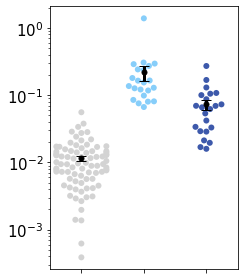

mann-whitney U test
Mk zero 6.725171626933536e-13
Mk nonzero 2.5044240179091023e-11
both manip models 4.2039839121966283e-05
0.011581360123762666 0.0009697094124528886
0.21883303088085515 0.05677312086583338
0.07293695178871168 0.012492061378217432


In [18]:
err_noforce_Mkzero = df_noforce_Mkzero['RMSE (exact)'].values
err_force_Mkzero = df_force_Mkzero['RMSE'].values
err_force_Mknonzero = df_force_Mknonzero['RMSE'].values
err_force_Mknonzero
var1 = (err_noforce_Mkzero)
var2 = (err_force_Mkzero)
var3 = (err_force_Mknonzero)

plt.figure(figsize=(3.5,4))
plt.yscale("log")
sns.swarmplot(data=[var1,var2,var3], palette = ["lightgray", "lightskyblue", "#3D59AB"], size = 6)
plt.errorbar([0,1,2],[np.mean(var1),np.mean(var2),np.mean(var3)],\
             yerr = [np.std(var1)/np.sqrt(len(var1)),np.std(var2)/np.sqrt(len(var2)),np.std(var3)/np.sqrt(len(var3))], 
             elinewidth = 3, fmt = '_', color = 'k', marker = '.', markersize = 10, capsize = 5, capthick = 1, zorder = 10)
plt.xticks([0,1,2], ("","",""))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylim(0.01,1)
plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/RMSE.pdf')
plt.show()


from scipy.stats import mannwhitneyu
print("mann-whitney U test")
print("Mk zero", mannwhitneyu(var1, var2, alternative='two-sided')[1])
print("Mk nonzero", mannwhitneyu(var1, var3, alternative='two-sided')[1])
print("both manip models", mannwhitneyu(var2, var3, alternative='two-sided')[1])

print(np.mean(var1), np.std(var1)/np.sqrt(len(var1)))
print(np.mean(var2), np.std(var2)/np.sqrt(len(var2)))
print(np.mean(var3), np.std(var3)/np.sqrt(len(var3)))


## Comparing manipulated data and Mk_nonzero Model (case 2) -- plotting values and positions of the curvature maxima and minima 

In [19]:
minC_val_ls,minC_pos_ls = [],[]
maxC_val_ls,maxC_pos_ls = [],[]
minM_val_ls,minM_pos_ls = [],[]
maxM_val_ls,maxM_pos_ls = [],[]

for index,row in df_force_Mknonzero.iterrows():
    x_dat = row["x_dat"]
    y_dat = row["y_dat"]
    x_mod = row["x"]
    y_mod = row["y"]
    M_mod = row["M"]
    xF = row["xF"]
    L = row["L"]
    spindle = row["Spindle"]
    iF_mod = np.where(x_mod > xF)[0][0]
    iF_dat = np.where(x_dat > xF)[0][0]

    s_dat,L_contour_dat = contour_fn(x_dat,y_dat)
    s_mod,L_contour_mod = contour_fn(x_mod,y_mod)

    M_max_ind = np.where(M_mod == np.max(M_mod))[0][0]
    M_min_ind = np.where(M_mod == np.min(M_mod[0:iF_mod]))[0][0]
    M_inflection_ind = np.where(np.abs(M_mod) == np.min(np.abs(M_mod[M_min_ind:iF_mod])))[0][0]

    window = 10
    C_dat = curvature(x_dat, y_dat,window)
    
#     if index==3:
#     plt.plot(x_dat,y_dat)
#     plt.show()
#     print(np.median(C_dat))
    C_max_ind = np.where(C_dat == np.max(C_dat))[0][0]+window
    C_min_ind = np.where(C_dat == np.min(C_dat[0:iF_dat]))[0][0]+window
    if not s_dat[C_min_ind] > 3.3:
#         print(index)

        minM_val_ls.append(M_mod[M_min_ind])
        minM_pos_ls.append(s_mod[M_min_ind])
        maxM_val_ls.append(M_mod[M_max_ind])
        maxM_pos_ls.append(s_mod[M_max_ind])
        minC_val_ls.append(C_dat[C_min_ind])
        minC_pos_ls.append(s_dat[C_min_ind])
        maxC_val_ls.append(C_dat[C_max_ind])
        maxC_pos_ls.append(s_dat[C_max_ind])


## Plotting

curvature minima positions:
0.2727918398388263 0.018156569444921312


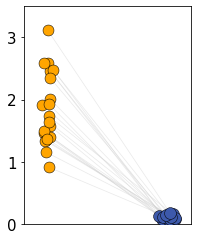

curvature maxima positions:
0.9489140172188429 4.500028558186331e-13


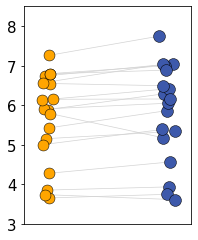

In [28]:
print("curvature minima positions:")
plt.figure(figsize=(3,4))
# plt.title("curvature minima positions")
var1 = (minC_pos_ls)
var2 = (minM_pos_ls)
pearsonr = scipy.stats.pearsonr(var2,var1)
print(pearsonr[0]**2,pearsonr[1])

seed = 4
np.random.seed(seed)
x1 = np.random.normal(0,0.03,len(var1))
x2 = np.random.normal(1,0.03,len(var2))

plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

for i in range(len(var1)):
    plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightgrey',alpha = 0.5)
plt.xlim(-0.2,1.2)
plt.ylim(0,3.5)
plt.xticks([])
plt.yticks([0,1,2,3])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
if save_images:
    plt.savefig('fig_outputs/curv_min_positions.pdf')
plt.show()

# print("curvature minima values:")
# plt.figure(figsize=(3,4))
# # plt.title("curvature minima positions")
# var1 = (minC_val_ls)
# var2 = (minM_val_ls)

# seed = 4
# np.random.seed(seed)
# x1 = np.random.normal(0,0.03,len(var1))
# x2 = np.random.normal(1,0.03,len(var2))

# plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
# plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

# for i in range(len(var1)):
#     plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightskyblue',alpha = 0.5)
# plt.xlim(-0.2,1.2)
# plt.ylim(-2,0)
# plt.xticks([])
# plt.yticks([-1,0,1])
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()


print("curvature maxima positions:")
plt.figure(figsize=(3,4))
# plt.title("curvature maxima positions")
var1 = (maxC_pos_ls)
var2 = (maxM_pos_ls)
pearsonr = scipy.stats.pearsonr(var2, var1)
print(pearsonr[0]**2,pearsonr[1])

seed = 4
np.random.seed(seed)
x1 = np.random.normal(0,0.03,len(var1))
x2 = np.random.normal(1,0.03,len(var2))

plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

for i in range(len(var1)):
    plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightgrey')
plt.xlim(-0.2,1.2)
plt.ylim(3,8.5)
plt.xticks([])
plt.yticks([3,4,5,6,7,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
if save_images:
    plt.savefig('fig_outputs/curv_max_positions.pdf')
plt.show()

# print("curvature maxima values:")
# plt.figure(figsize=(3,4))
# # plt.title("curvature maxima positions")
# var1 = (maxC_val_ls)
# var2 = (maxM_val_ls)

# seed = 4
# np.random.seed(seed)
# x1 = np.random.normal(0,0.03,len(var1))
# x2 = np.random.normal(1,0.03,len(var2))

# plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
# plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

# for i in range(len(var1)):
#     plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightskyblue')
# plt.xlim(-0.2,1.2)
# # plt.ylim(3,8)
# plt.xticks([])
# # plt.yticks([3,4,5,6,7,8])
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()



In [22]:
import numpy as np
import numpy.linalg as LA

def angle_bw_vectors(vector1,vector2,units="rad"):
    
    a = np.array([vector1[0], vector1[1]])
    b = np.array([vector2[0], vector2[1]])
    
    inner = np.inner(a, b)
    norms = LA.norm(a) * LA.norm(b)
    
    cos = inner / norms
    rad = np.arccos(np.clip(cos, -1.0, 1.0))
    deg = np.rad2deg(rad)
    
    if units == "rad":
        return rad
    elif units == "deg":
        return deg
    else:
        return "need to define units"


0.4303573086568609 0.0009159135735441033


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal


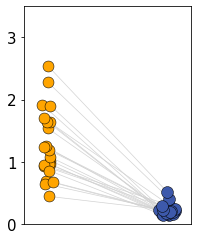

In [29]:
dat_ls,mod_ls=[],[]
cutoff_angle = 1

for index,row in df_force_Mknonzero.iterrows():
    x_dat = row["x_dat"]
    y_dat = row["y_dat"]
    x_mod = row["x"]
    y_mod = row["y"]

#     x_dat = np.flip(x_dat)
#     y_dat = np.flip(y_dat)

    s_dat,L_contour_dat = contour_fn(x_dat,y_dat)
    s_mod,L_contour_mod = contour_fn(x_mod,y_mod)

    angle_dat, angle_mod = [],[]
    n_d=1
    n_m = 1
    for i in range(len(x_dat)):
        vector1 = [x_dat[n_d]-x_dat[0],y_dat[n_d]-y_dat[0]]
        vector2 = [x_dat[i]-x_dat[0],y_dat[i]-y_dat[0]]
        angle_dat.append(angle_bw_vectors(vector1,vector2,"deg"))

    for i in range(len(x_mod)):
        vector1 = [x_mod[n_m]-x_mod[0],y_mod[n_m]-y_mod[0]]
        vector2 = [x_mod[i]-x_mod[0],y_mod[i]-y_mod[0]]
        angle_mod.append(angle_bw_vectors(vector1,vector2,"deg"))

    angle_dat_diff, angle_mod_diff = [],[]
    for i in range(len(angle_dat)-1):
        angle_dat_diff.append(angle_dat[i+1] - angle_dat[i])
    for i in range(len(angle_mod)-1):
        angle_mod_diff.append(angle_mod[i+1] - angle_mod[i])
    
#     plt.plot(s_dat,angle_dat,color="orange")
#     plt.plot(s_mod,angle_mod,color='#3D59AB')
# #     plt.xlim(-0.1,2)
#     plt.show()

    
    ind_dat = np.where(np.array(angle_dat) >= cutoff_angle)[0][0]
    ind_mod = np.where(np.array(angle_mod) >= cutoff_angle)[0][0]
    dat_ls.append(s_dat[ind_dat])
    mod_ls.append(s_mod[ind_mod])
    
plt.figure(figsize=(3,4))
# plt.title("curvature maxima positions")
var1 = (dat_ls)
var2 = (mod_ls)
pearsonr = scipy.stats.pearsonr(var2, var1)
print(pearsonr[0]**2,pearsonr[1])

seed = 4
np.random.seed(seed)
x1 = np.random.normal(0,0.03,len(var1))
x2 = np.random.normal(1,0.03,len(var2))

plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

for i in range(len(var1)):
    plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightgrey')
plt.xlim(-0.2,1.2)
plt.ylim(0,3.5)
plt.xticks([])
plt.yticks([0,1,2,3])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.tight_layout()
if save_images:
    plt.savefig('fig_outputs/orientation_angle.pdf')
plt.show()


### at what point from the chromosomes does the k-fiber angle hit 5 degrees relative to the plus end? in the data vs model
### could set other cutoff angles for the SI (2,10,etc.). Regardless, our conclusions will be the same

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal


0.4303573086568609 0.0009159135735441033


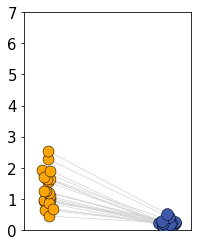

0.47880820940465674 0.00036009192663515505


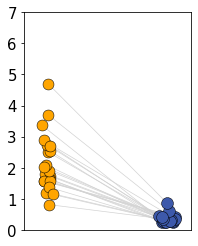

0.5212394379879963 0.00014859245153702008


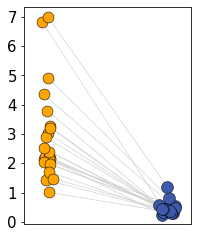

In [24]:
cutoff_angle = [1,3,5]

for angle in cutoff_angle:
    dat_ls,mod_ls=[],[]
    for index,row in df_force_Mknonzero.iterrows():
        x_dat = row["x_dat"]
        y_dat = row["y_dat"]
        x_mod = row["x"]
        y_mod = row["y"]

#         x_dat = np.flip(x_dat)
#         y_dat = np.flip(y_dat)

        s_dat,L_contour_dat = contour_fn(x_dat,y_dat)
        s_mod,L_contour_mod = contour_fn(x_mod,y_mod)

        angle_dat, angle_mod = [],[]
        n_d=1
        n_m =1
        for i in range(len(x_dat)):
            vector1 = [x_dat[n_d]-x_dat[0],y_dat[n_d]-y_dat[0]]
            vector2 = [x_dat[i]-x_dat[0],y_dat[i]-y_dat[0]]
            angle_dat.append(angle_bw_vectors(vector1,vector2,"deg"))

        for i in range(len(x_mod)):
            vector1 = [x_mod[n_m]-x_mod[0],y_mod[n_m]-y_mod[0]]
            vector2 = [x_mod[i]-x_mod[0],y_mod[i]-y_mod[0]]
            angle_mod.append(angle_bw_vectors(vector1,vector2,"deg"))

        angle_dat_diff, angle_mod_diff = [],[]
        for i in range(len(angle_dat)-1):
            angle_dat_diff.append(angle_dat[i+1] - angle_dat[i])
        for i in range(len(angle_mod)-1):
            angle_mod_diff.append(angle_mod[i+1] - angle_mod[i])

    #     plt.plot(s_dat,angle_dat,color="orange")
    #     plt.plot(s_mod,angle_mod,color='#3D59AB')
    # #     plt.xlim(-0.1,2)
    #     plt.show()


        ind_dat = np.where(np.array(angle_dat) >= angle)[0][0]
        ind_mod = np.where(np.array(angle_mod) >= angle)[0][0]
        dat_ls.append(s_dat[ind_dat])
        mod_ls.append(s_mod[ind_mod])

    plt.figure(figsize=(3,4))
    # plt.title("curvature maxima positions")
    var1 = (dat_ls)
    var2 = (mod_ls)
    pearsonr = scipy.stats.pearsonr(var2, var1)
    print(pearsonr[0]**2,pearsonr[1])

    seed = 4
    np.random.seed(seed)
    x1 = np.random.normal(0,0.03,len(var1))
    x2 = np.random.normal(1,0.03,len(var2))

    plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
    plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

    for i in range(len(var1)):
        plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightgrey')
    plt.xlim(-0.2,1.2)
    # plt.ylim(3,8)
    plt.xticks([])
    plt.yticks([0,1,2,3,4,5,6,7])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if save_images:
        plt.savefig('fig_outputs/orientation_angle_%s.pdf'%angle)
    plt.show()


### at what point from the chromosomes does the k-fiber angle hit 5 degrees relative to the plus end? in the data vs model
### could set other cutoff angles for the SI (2,10,etc.). Regardless, our conclusions will be the same

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


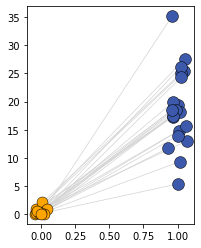

In [25]:
# cutoff_angle = [1,3,5]

# for angle in cutoff_angle:
dat_ls,mod_ls=[],[]
for index,row in df_force_Mknonzero.iterrows():
    x_dat = row["x_dat"]
    y_dat = row["y_dat"]
    x_mod = row["x"]
    y_mod = row["y"]

#         x_dat = np.flip(x_dat)
#         y_dat = np.flip(y_dat)

    s_dat,L_contour_dat = contour_fn(x_dat,y_dat)
    s_mod,L_contour_mod = contour_fn(x_mod,y_mod)

    angle_dat, angle_mod = [],[]
    n_d=1
    n_m =1
    for i in range(len(x_dat)):
        vector1 = [x_dat[n_d]-x_dat[0],y_dat[n_d]-y_dat[0]]
        vector2 = [x_dat[i]-x_dat[0],y_dat[i]-y_dat[0]]
        angle_dat.append(angle_bw_vectors(vector1,vector2,"deg"))

    for i in range(len(x_mod)):
        vector1 = [x_mod[n_m]-x_mod[0],y_mod[n_m]-y_mod[0]]
        vector2 = [x_mod[i]-x_mod[0],y_mod[i]-y_mod[0]]
        angle_mod.append(angle_bw_vectors(vector1,vector2,"deg"))

    angle_dat_diff, angle_mod_diff = [],[]
    for i in range(len(angle_dat)-1):
        angle_dat_diff.append(angle_dat[i+1] - angle_dat[i])
    for i in range(len(angle_mod)-1):
        angle_mod_diff.append(angle_mod[i+1] - angle_mod[i])

#     plt.plot(s_dat,angle_dat,color="orange")
#     plt.plot(s_mod,angle_mod,color='#3D59AB')
#     plt.show()


    dat_ls.append((angle_dat[3] - angle_dat[1])/(s_dat[3] - s_dat[1]))
    mod_ls.append((angle_mod[3] - angle_mod[1])/(s_mod[3] - s_mod[1]))

plt.figure(figsize=(3,4))
var1 = (dat_ls)
var2 = (mod_ls)

seed = 4
np.random.seed(seed)
x1 = np.random.normal(0,0.03,len(var1))
x2 = np.random.normal(1,0.03,len(var2))

plt.scatter(x1,var1,color="orange",edgecolor='k',lw=0.5,s=120,zorder=10)
plt.scatter(x2,var2,color='#3D59AB',edgecolor='k',lw=0.5,s=140,zorder=10)

for i in range(len(var1)):
    plt.plot([x1[i],x2[i]],[var1[i],var2[i]],lw=0.7,color='lightgrey')
# plt.xlim(-0.2,1.2)
# plt.ylim(3,8)
# plt.xticks([])
# plt.yticks([0,1,2,3,4,5,6,7])
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# if save_images:
#     plt.savefig('fig_outputs/orientation_angle_%s.pdf'%angle)
plt.show()


### at what point from the chromosomes does the k-fiber angle hit 5 degrees relative to the plus end? in the data vs model
### could set other cutoff angles for the SI (2,10,etc.). Regardless, our conclusions will be the same

In [42]:
dat_ls

[0.16684290959218234,
 0.17012425183837218,
 0.3361936008879732,
 0.5603960513990545,
 0.8281430493792653,
 0.24717997311858508,
 0.7009542196509523,
 0.3760041630142402,
 0.7868603389258553,
 0.7620542451450216,
 0.3188707046039293,
 0.1341506612740546,
 0.6685237584258525,
 1.7020533807530278,
 0.15189932145468926,
 0.2838976600528281,
 0.2014628913906749,
 0.945148373309325,
 0.2097235003625918,
 0.14617643361170782,
 0.5131016599198472,
 0.16429127017475456]

In [8]:
df_force_Mkzero['Fext'].mean()

1.9976098057384242